## EDA

First 5 rows:
    Customer_ID  Recency  Frequency  Monetary  Price_Rand  Units_Demanded  \
0            1       52         15      2931        3999               7   
1            2       93          7      2973        4152              16   
2            3       15         12      1770        1698              90   
3            4       72          8      2890        3160              60   
4            5       61         15      4040        5097               2   

   Ad_Spend  Bedrooms  Near_Gautrain Product_Preference Purchase_Channel  \
0      2585         2              1             Laptop         In-store   
1      1899         3              0             Mobile         In-store   
2      2174         1              0                 TV           Online   
3       325         1              1             Laptop           Online   
4       897         1              1                 TV         In-store   

  Loyalty_Member  
0            Yes  
1             No  
2             

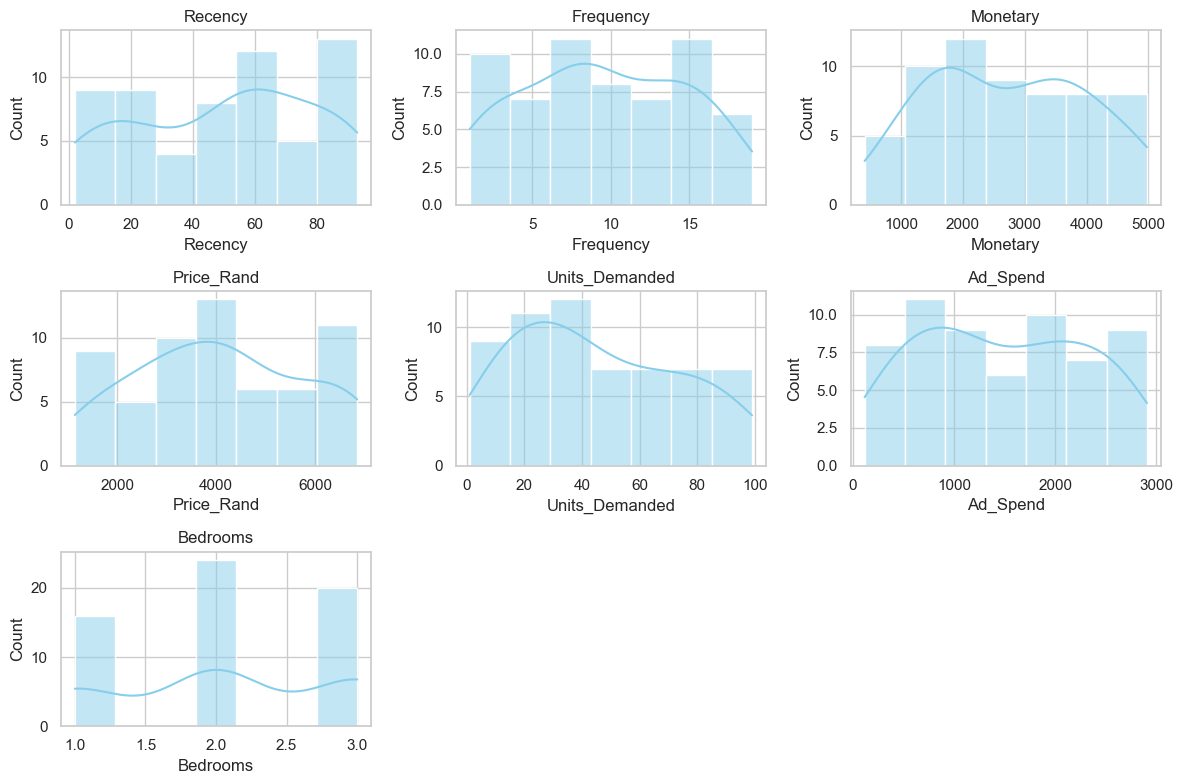

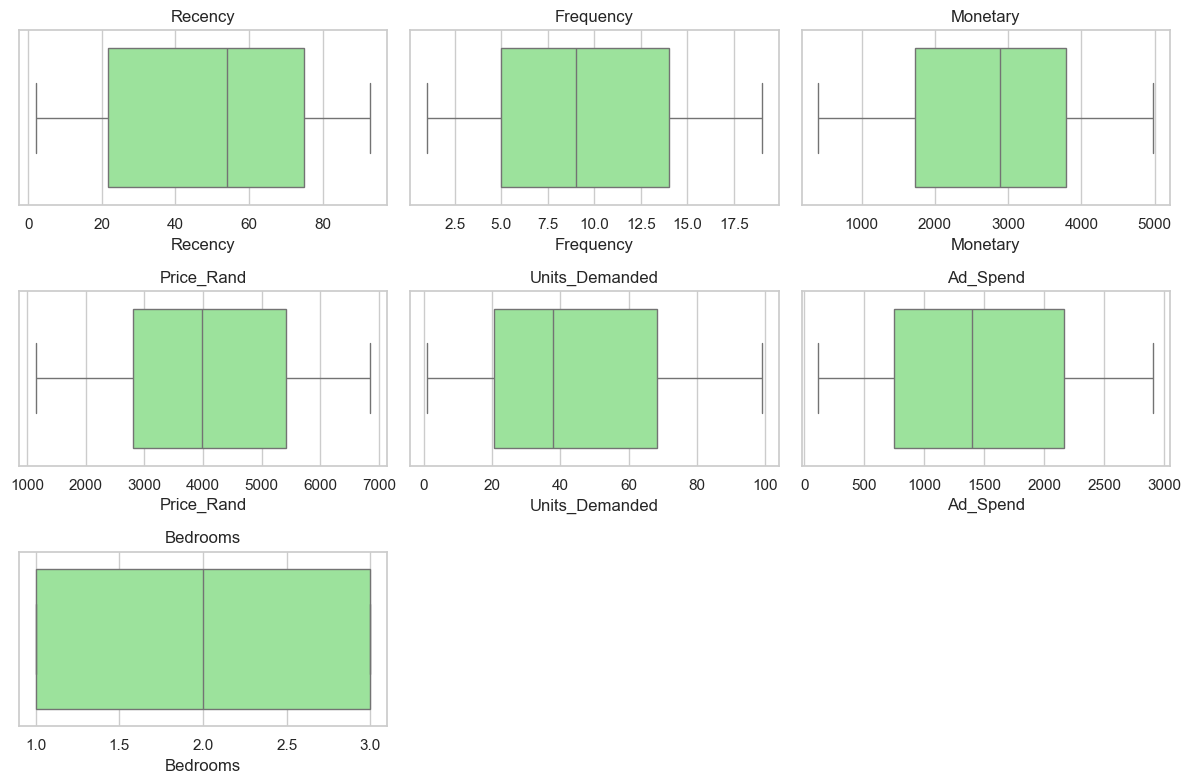

/var/folders/t3/qryknyz567z6p4dzthgqp2s80000gn/T/ipykernel_3310/2119811979.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/var/folders/t3/qryknyz567z6p4dzthgqp2s80000gn/T/ipykernel_3310/2119811979.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/var/folders/t3/qryknyz567z6p4dzthgqp2s80000gn/T/ipykernel_3310/2119811979.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/var/folders/t3/qryknyz567z6p4dzthgqp2s80000gn/T/ipyker

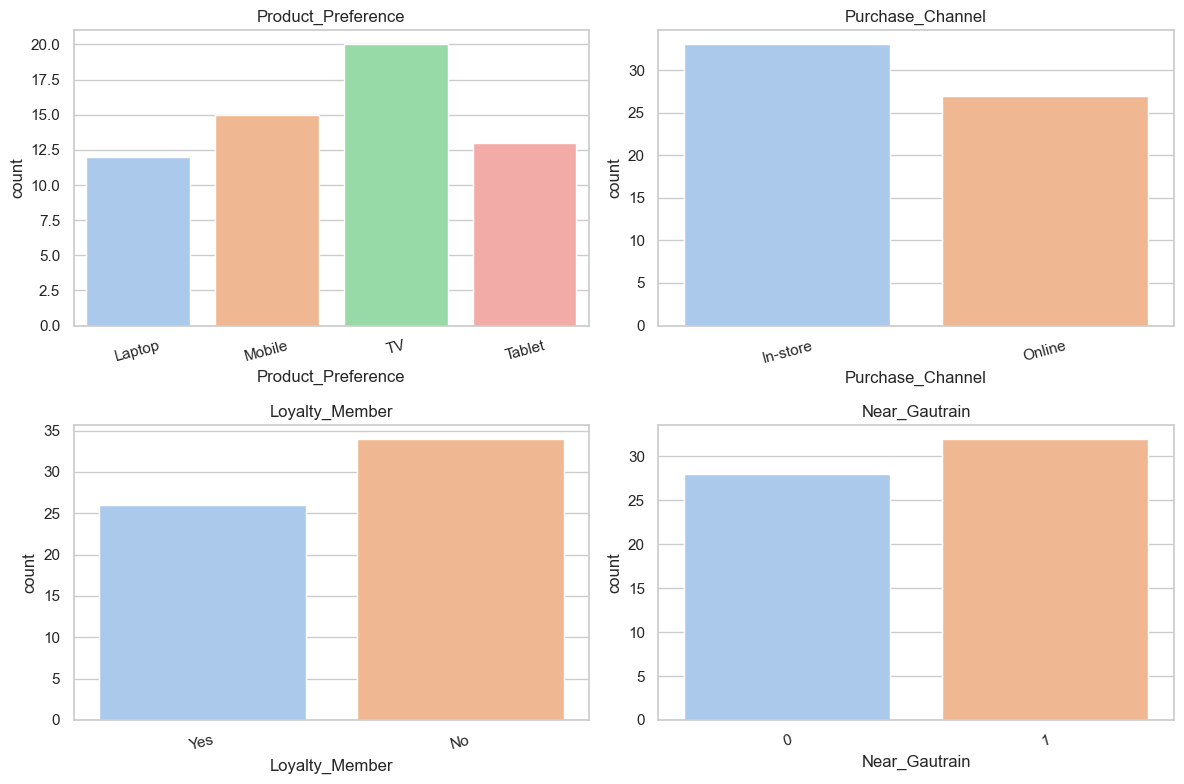

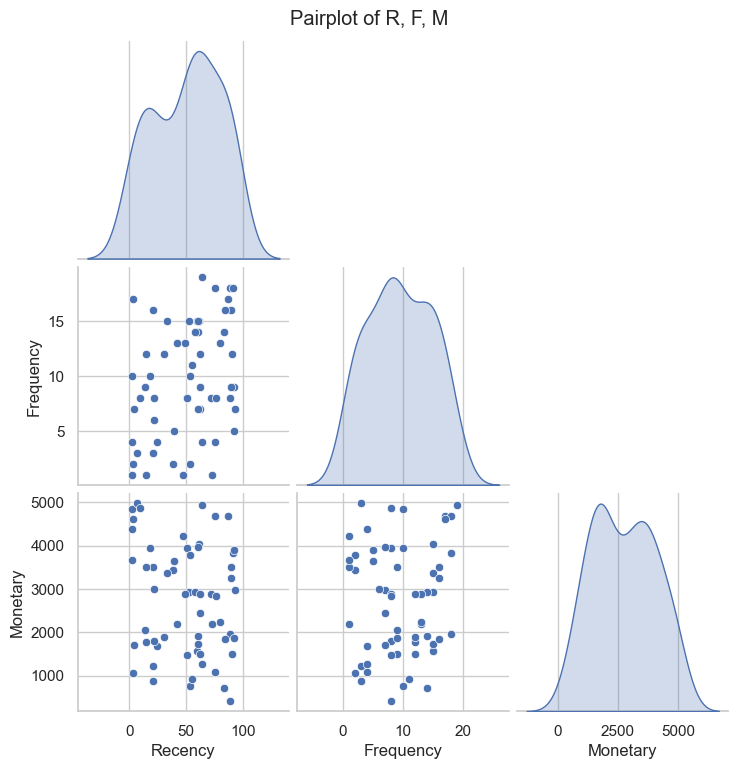

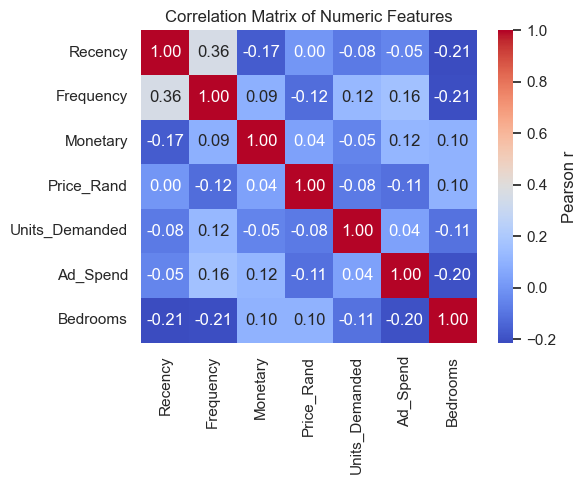

In [20]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



#-------------------------------------------------------------------------------
# Load the dataset
#-------------------------------------------------------------------------------
df = pd.read_csv('Marketing Analytics Assignment 2.csv')

#-------------------------------------------------------------------------------
# Overview: rows, columns, types
#-------------------------------------------------------------------------------
print("First 5 rows:\n", df.head(), "\n")
print("Info:\n")
df.info()

#-------------------------------------------------------------------------------
# Descriptive statistics
#-------------------------------------------------------------------------------
# Numeric summary
print("\nNumeric summary:\n", df.describe(), "\n")
# Categorical summary
print("Categorical summary:\n", df.describe(include=['object']), "\n")

#-------------------------------------------------------------------------------
# Missing data check
#-------------------------------------------------------------------------------
print("Missing values per column:\n", df.isnull().sum(), "\n")

#-------------------------------------------------------------------------------
# Visual exploration
#-------------------------------------------------------------------------------
sns.set(style='whitegrid')

# 1. Histograms for numeric variables
num_cols = ['Recency', 'Frequency', 'Monetary', 'Price_Rand',
            'Units_Demanded', 'Ad_Spend', 'Bedrooms']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Boxplots to detect outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

# 3. Bar plots for categorical features
cat_cols = ['Product_Preference', 'Purchase_Channel', 'Loyalty_Member',
            'Near_Gautrain']
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(col)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 4. Pairwise scatterplot matrix of R, F, M
sns.pairplot(df[['Recency', 'Frequency', 'Monetary']],
             kind='scatter', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of R, F, M', y=1.02)
plt.show()

# 5. Correlation heatmap for numeric variables
corr = df[num_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",
            cbar_kws={'label': 'Pearson r'})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


## RFM

Data Preview:
   Customer_ID  Recency  Frequency  Monetary  Price_Rand  Units_Demanded  \
0            1       52         15      2931        3999               7   
1            2       93          7      2973        4152              16   
2            3       15         12      1770        1698              90   
3            4       72          8      2890        3160              60   
4            5       61         15      4040        5097               2   

   Ad_Spend  Bedrooms  Near_Gautrain Product_Preference Purchase_Channel  \
0      2585         2              1             Laptop         In-store   
1      1899         3              0             Mobile         In-store   
2      2174         1              0                 TV           Online   
3       325         1              1             Laptop           Online   
4       897         1              1                 TV         In-store   

  Loyalty_Member  
0            Yes  
1             No  
2             N

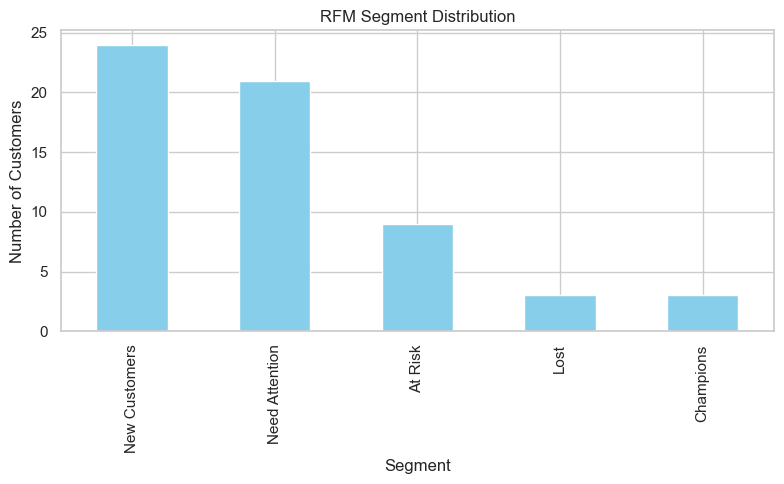

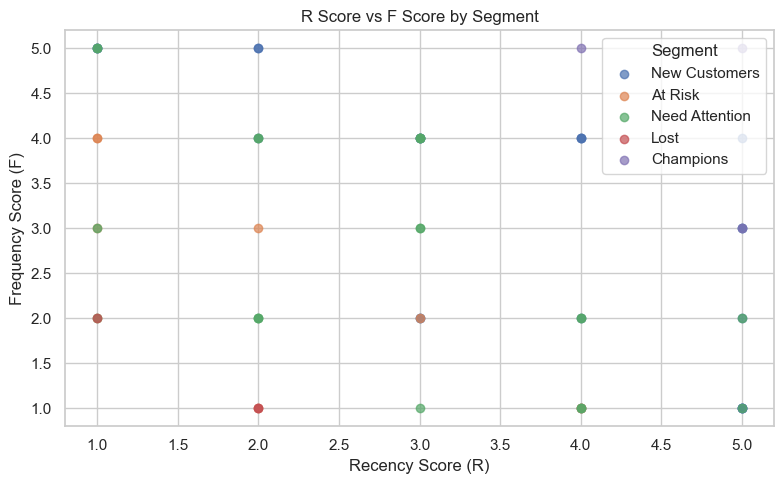

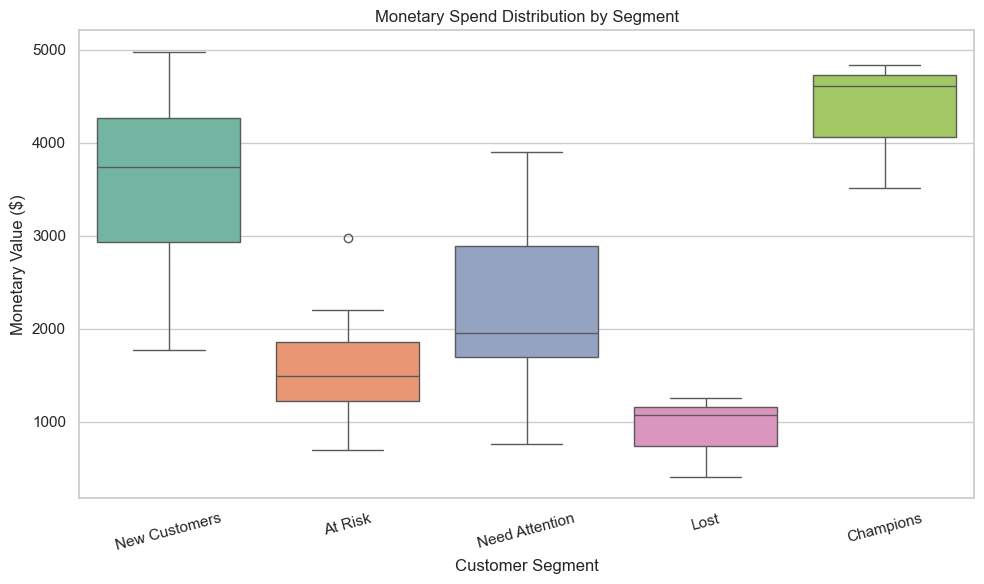

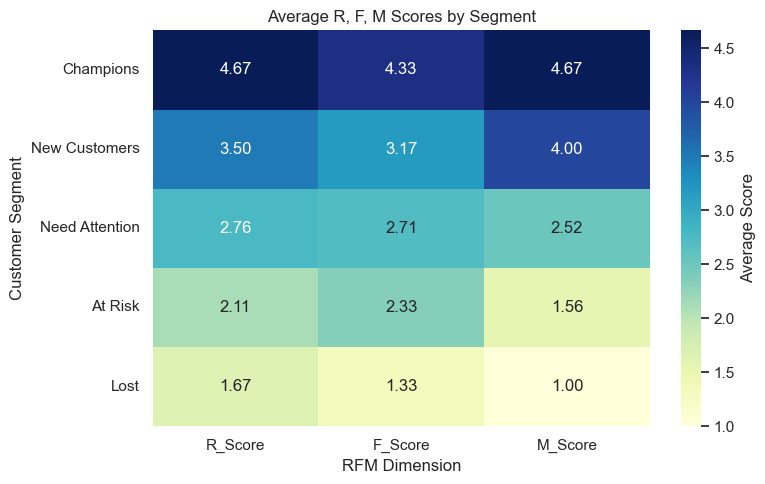

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load the dataset
# We load the CSV file containing 60 recent transactions and customer interactions.
df = pd.read_csv('Marketing Analytics Assignment 2.csv')

# Step 2: Preview the data
# Display first few rows and data info to verify column names, types, and missing values.
print("Data Preview:")
print(df.head())
print("\nData Info:")
print(df.info())

# Step 3: Prepare the RFM DataFrame
# We focus on the three key dimensions—Recency, Frequency, Monetary—and Customer_ID.
# Recency: days since last purchase
# Frequency: number of purchases
# Monetary: total spend
rfm = df[['Customer_ID', 'Recency', 'Frequency', 'Monetary']].copy()

# Step 4: Compute R, F, M scores using quintiles
# - Recency: lower is better, so invert quintile labels (5 = most recent)
# - Frequency & Monetary: higher is better, so direct quintile labels (5 = highest)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Step 5: Aggregate to overall RFM score
# Summing the individual R, F, M scores yields a range from 3 (lowest) to 15 (highest).
rfm['RFM_Score'] = (rfm['R_Score'] +
                    rfm['F_Score'] +
                    rfm['M_Score'])

# Step 6: Assign customer segments based on RFM score
# Champions (13-15): top-value, most engaged
# New Customers (10-12): recent buyers with growth potential
# Need Attention (7-9): moderate value, risk of lapse
# At Risk (5-6): low engagement, imminent churn risk
# Lost (<5): minimal value, very low engagement
def assign_segment(score):
    if score >= 13:
        return 'Champions'
    elif score >= 10:
        return 'New Customers'
    elif score >= 7:
        return 'Need Attention'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

# Step 7: Display the full RFM table with scores and segments
print("\nRFM Table with Scores & Segments:")
print(rfm.head())

# Step 8: Show segment distribution counts for reporting
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
print("\nRFM Segment Counts:")
print(segment_counts)

# Step 9: Visualization 1 - Bar chart of segment distribution
plt.figure(figsize=(8, 5))
segment_counts.set_index('Segment')['Count'].plot(kind='bar',
                                                 color='skyblue')
plt.title('RFM Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Step 10: Visualization 2 - Scatter plot of R_Score vs F_Score by segment
plt.figure(figsize=(8, 5))
for seg in rfm['Segment'].unique():
    subset = rfm[rfm['Segment'] == seg]
    plt.scatter(subset['R_Score'],
                subset['F_Score'],
                label=seg,
                alpha=0.7)
plt.title('R Score vs F Score by Segment')
plt.xlabel('Recency Score (R)')
plt.ylabel('Frequency Score (F)')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# Boxplot: Monetary spend distribution by RFM segment
# --------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm, hue='Segment', y='Monetary', x='Segment', palette='Set2', legend=False)
plt.title('Monetary Spend Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Monetary Value ($)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# Heatmap: Average R, F, M scores per segment
# --------------------------------------------------------------------------------
# Compute average scores for each segment
segment_means = (
    rfm
    .groupby('Segment')[['R_Score', 'F_Score', 'M_Score']]
    .mean()
    .reindex(['Champions', 'New Customers', 'Need Attention', 'At Risk', 'Lost'])
)

plt.figure(figsize=(8, 5))
sns.heatmap(segment_means,
            annot=True,
            fmt=".2f",
            cmap='YlGnBu',
            cbar_kws={'label': 'Average Score'})
plt.title('Average R, F, M Scores by Segment')
plt.xlabel('RFM Dimension')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()


## LCA

BIC by #classes: {2: np.float64(-2772.7123650355898), 3: np.float64(-2845.4051391145895), 4: np.float64(-2766.3301201747636), 5: np.float64(-2806.1241839990976), 6: np.float64(-2761.9744170930126)}
Selected # of classes: 3

LCA Class Distribution:
 LCA_Class
0    10
1    25
2    25
Name: count, dtype: int64


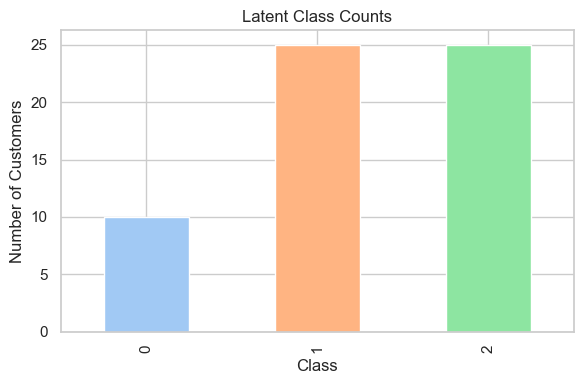

<Figure size 800x400 with 0 Axes>

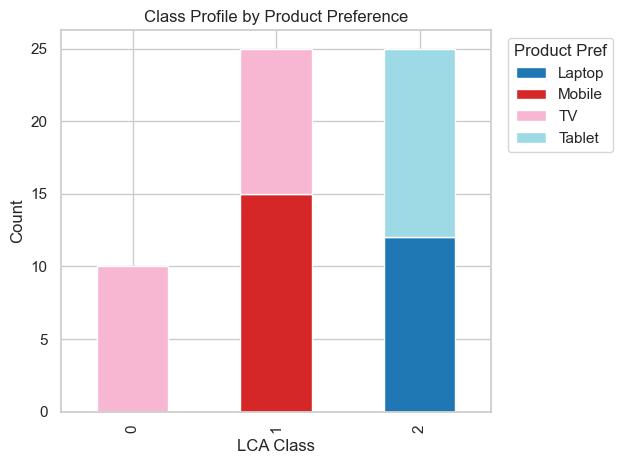

In [16]:

#-------------------------------------------------------------------------------
# Select and clean categorical variables
#-------------------------------------------------------------------------------
cat_cols = ['Product_Preference', 'Purchase_Channel', 'Loyalty_Member']
# Drop any rows with missing values in these columns (if present)
df_lca = df.dropna(subset=cat_cols).copy()

#-------------------------------------------------------------------------------
# One‑hot encode categories
#-------------------------------------------------------------------------------
encoder = OneHotEncoder(sparse_output=False, dtype=int)
X_cat = encoder.fit_transform(df_lca[cat_cols])

#-------------------------------------------------------------------------------
# Determine optimal number of classes via BIC
#-------------------------------------------------------------------------------
bics = {}
for k in range(2, 7):
    gmm = GaussianMixture(n_components=k,
                          covariance_type='full',
                          random_state=42)
    gmm.fit(X_cat)
    bics[k] = gmm.bic(X_cat)

best_k = min(bics, key=bics.get)
print("BIC by #classes:", bics)
print("Selected # of classes:", best_k)

#-------------------------------------------------------------------------------
# Fit final GMM and assign class labels
#-------------------------------------------------------------------------------
gmm_final = GaussianMixture(n_components=best_k,
                            covariance_type='full',
                            random_state=42)
df_lca['LCA_Class'] = gmm_final.fit_predict(X_cat)

# Merge class labels back into original DataFrame
df = df.merge(df_lca[['Customer_ID', 'LCA_Class']],
              on='Customer_ID',
              how='left')

#-------------------------------------------------------------------------------
# Summarize and visualize classes
#-------------------------------------------------------------------------------
class_counts = df['LCA_Class'].value_counts().sort_index()
print("\nLCA Class Distribution:\n", class_counts)

# Bar chart of class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Latent Class Counts')
plt.xlabel('Class')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Profile each class by product preference
profile = (df
           .groupby(['LCA_Class', 'Product_Preference'])
           .size()
           .unstack(fill_value=0))
plt.figure(figsize=(8,4))
profile.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Class Profile by Product Preference')
plt.xlabel('LCA Class')
plt.ylabel('Count')
plt.legend(title='Product Pref', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


## PED

                            OLS Regression Results                            
Dep. Variable:         Units_Demanded   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3832
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.538
Time:                        19:12:34   Log-Likelihood:                -285.92
No. Observations:                  60   AIC:                             575.8
Df Residuals:                      58   BIC:                             580.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.7851      9.738      5.215      0.0

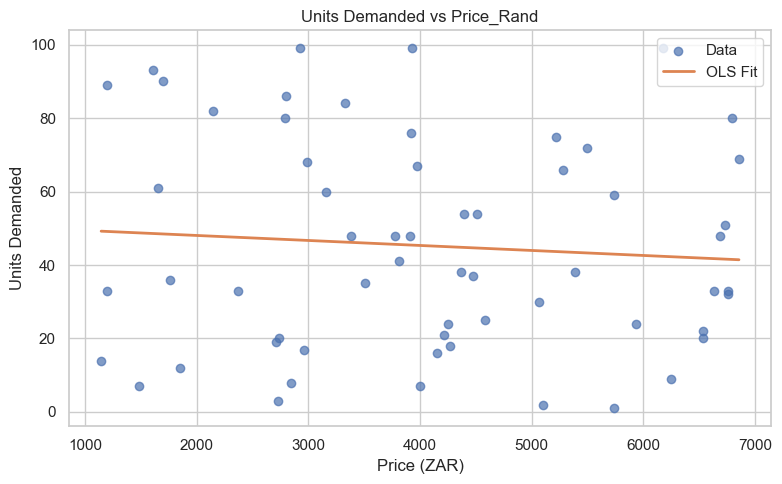

In [19]:


# Simple OLS: Units_Demanded ~ Price_Rand
y = df['Units_Demanded']
X = sm.add_constant(df['Price_Rand'])
model_price = sm.OLS(y, X).fit()
print(model_price.summary())

# Compute elasticity at the sample mean
mean_P = df['Price_Rand'].mean()
mean_Q = df['Units_Demanded'].mean()
beta_p = model_price.params['Price_Rand']
ped_mean = beta_p * (mean_P / mean_Q)
print(f'Elasticity at mean (PED): {ped_mean:.2f}')

# Midpoint (arc‐elasticity) between min & max price
P1, P2 = df['Price_Rand'].min(), df['Price_Rand'].max()
Q1 = df.loc[df['Price_Rand'] == P1, 'Units_Demanded'].mean()
Q2 = df.loc[df['Price_Rand'] == P2, 'Units_Demanded'].mean()
pct_dQ = (Q2 - Q1) / ((Q1 + Q2) / 2)
pct_dP = (P2 - P1) / ((P1 + P2) / 2)
ped_mid = pct_dQ / pct_dP
print(f'Midpoint PED: {ped_mid:.2f}')

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(df['Price_Rand'], df['Units_Demanded'],
            alpha=0.7, color='C0', label='Data')
# Regression line
price_range = np.linspace(P1, P2, 100)
pred_line = model_price.params['const'] + model_price.params[
    'Price_Rand'] * price_range
plt.plot(price_range, pred_line, color='C1', lw=2, label='OLS Fit')
plt.title('Units Demanded vs Price_Rand')
plt.xlabel('Price (ZAR)')
plt.ylabel('Units Demanded')
plt.legend()
plt.tight_layout()
plt.show()


## Multiple Regression for Units Demanded

                            OLS Regression Results                            
Dep. Variable:         Units_Demanded   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.4286
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.787
Time:                        19:24:00   Log-Likelihood:                -285.19
No. Observations:                  60   AIC:                             580.4
Df Residuals:                      55   BIC:                             590.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            62.0987     17.876      3.474

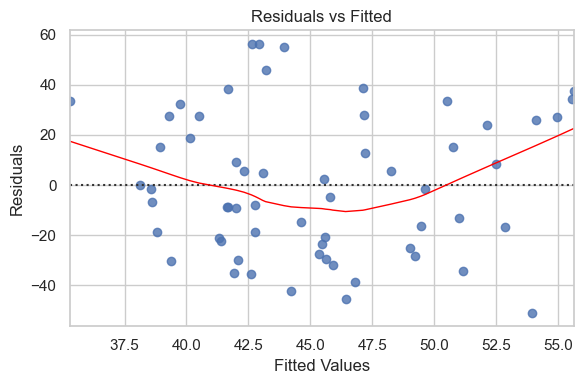

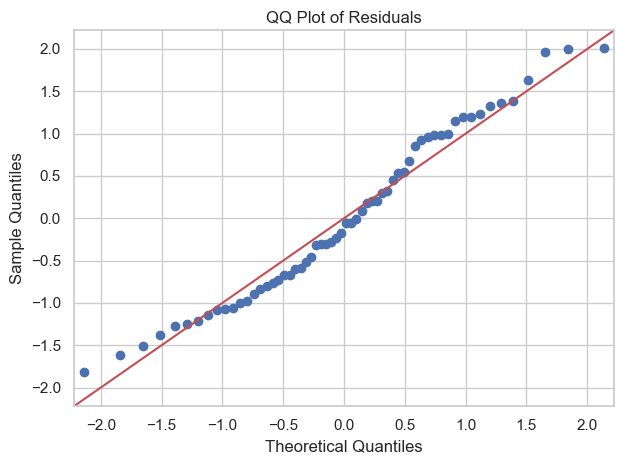

In [21]:
# Define dependent and independent variables
y = df['Units_Demanded']
X = df[['Price_Rand', 'Ad_Spend', 'Bedrooms', 'Near_Gautrain']]
X = sm.add_constant(X)

# Fit multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Check multicollinearity via VIF
vif_df = pd.DataFrame({
    'variable': X.columns,
    'VIF': [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
})
print("\nVariance Inflation Factors:")
print(vif_df)

# Residual diagnostics
# 5a: Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.residplot(
    x=model.fittedvalues,
    y=model.resid,
    lowess=True,
    line_kws={'color': 'red', 'lw': 1}
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.tight_layout()
plt.show()

# 5b: QQ‐plot of residuals
fig = sm.qqplot(model.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()


### Applying recommendations

In [22]:

# --- 1) Recompute RFM segments if not already present ---
# Score R, F, M
rfm = df[['Customer_ID', 'Recency', 'Frequency', 'Monetary']].copy()
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5,
                         labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5,
                         labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5,
                         labels=[1,2,3,4,5]).astype(int)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

def assign_segment(score):
    if score >= 13:
        return 'Champions'
    elif score >= 10:
        return 'New_Customers'
    elif score >= 7:
        return 'Need_Attention'
    elif score >= 5:
        return 'At_Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

# Merge RFM segment back into df
df = df.merge(rfm[['Customer_ID', 'Segment']],
              on='Customer_ID', how='left')

# --- 2) Create dummy variables ---
# Product preference & RFM segment as categorical dummies
df_dum = pd.get_dummies(df,
                        columns=['Product_Preference','Segment'],
                        drop_first=True)

# Define features and target
features = [
    'Price_Rand','Ad_Spend','Bedrooms','Near_Gautrain'
] + \
    [col for col in df_dum.columns
     if col.startswith('Product_Preference_')] + \
    [col for col in df_dum.columns
     if col.startswith('Segment_')]

X = df_dum[features]
X = sm.add_constant(X)
y = df_dum['Units_Demanded']

# --- 3) Fit extended regression ---
model_ext = sm.OLS(y, X).fit()
print(model_ext.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).